In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the data
behaviors_df = pd.read_csv('/Users/macbookair/Documents/Project/fItneSS_us/backend/recommendation/datasets/MIND/MINDlarge_dev/behaviors.tsv', sep='\t', header=None)
news_df = pd.read_csv('/Users/macbookair/Documents/Project/fItneSS_us/backend/recommendation/datasets/MIND/MINDlarge_dev/news.tsv', sep='\t', header=None)

In [3]:
# Basic overview of the data
print("Behaviors DataFrame head:")
print(behaviors_df.head())
print("\nNews DataFrame head:")
print(news_df.head())


Behaviors DataFrame head:
   0        1                       2  \
0  1  U134050   11/15/2019 8:55:22 AM   
1  2  U254959  11/15/2019 11:42:35 AM   
2  3  U499841   11/15/2019 9:08:21 AM   
3  4  U107107   11/15/2019 5:50:31 AM   
4  5  U492344   11/15/2019 5:02:25 AM   

                                                   3  \
0  N12246 N128820 N119226 N4065 N67770 N33446 N10...   
1  N34011 N9375 N67397 N7936 N118985 N109453 N103...   
2  N63858 N26834 N6379 N85484 N15229 N65119 N1047...   
3  N12959 N8085 N18389 N3758 N9740 N90543 N129790...   
4  N109183 N48453 N85005 N45706 N98923 N46069 N35...   

                                                   4  
0  N91737-0 N30206-0 N54368-0 N117802-0 N18190-0 ...  
1  N119999-0 N24958-0 N104054-0 N33901-0 N9250-0 ...  
2  N18190-0 N89764-0 N91737-0 N54368-0 N49978-1 N...  
3  N122944-1 N18190-0 N55801-0 N59297-0 N128045-0...  
4  N64785-0 N82503-0 N32993-0 N122944-0 N29160-0 ...  

News DataFrame head:
        0          1                2 

In [4]:

# Basic statistics
print("\nBehavior statistics:")
print(behaviors_df.describe())
print("\nNews statistics:")
print(news_df.describe())



Behavior statistics:
                   0
count  376471.000000
mean   188236.000000
std    108677.960934
min         1.000000
25%     94118.500000
50%    188236.000000
75%    282353.500000
max    376471.000000

News statistics:
             0      1       2  \
count    72023  72023   72023   
unique   72023     17     269   
top     N88753   news  newsus   
freq         1  21826    9971   

                                                        3  \
count                                               72023   
unique                                              70316   
top     Powerball Winning Numbers For 10/26/2019 Drawi...   
freq                                                   21   

                                                        4      5      6      7  
count                                               68400  72023  72021  72018  
unique                                              65871  72022  48107  51034  
top     What's the weather today? What's the weather f..

/var/folders/8l/zx9sdfms2gj66cqpyrj5nvsc0000gn/T/ipykernel_3825/3977974026.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_counts.index, y=category_counts.values, palette='viridis')


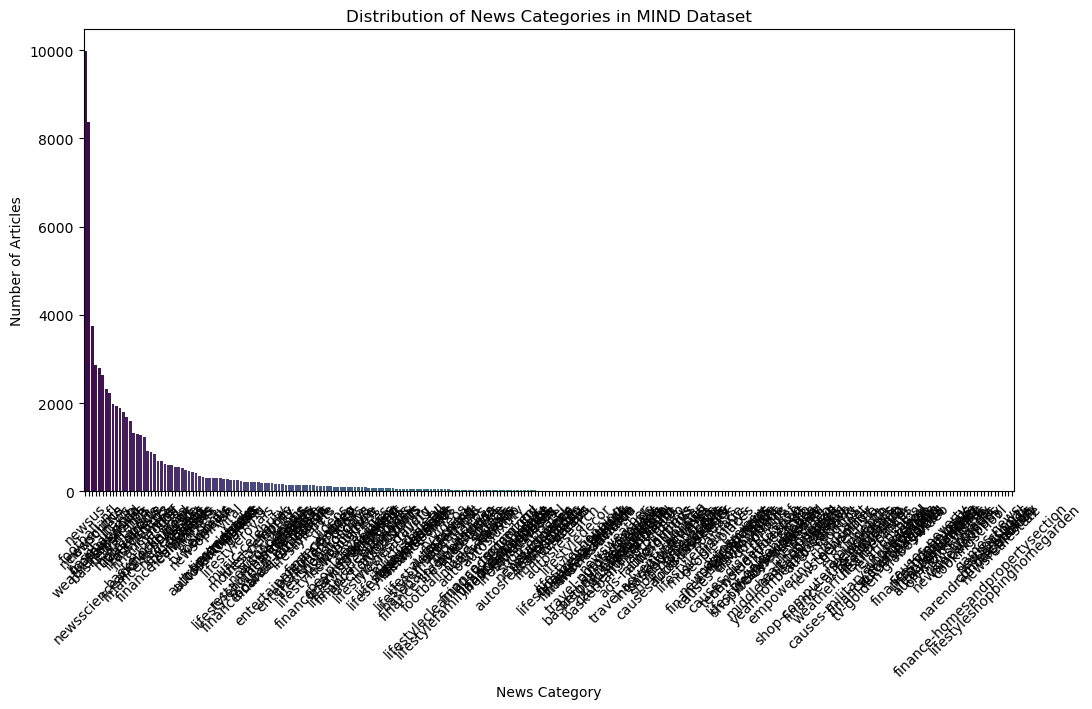

In [6]:

# Visualization of news category distribution
plt.figure(figsize=(12, 6))
category_counts = news_df[2].value_counts()
sns.barplot(x=category_counts.index, y=category_counts.values, palette='viridis')
plt.xticks(rotation=45)
plt.xlabel('News Category')
plt.ylabel('Number of Articles')
plt.title('Distribution of News Categories in MIND Dataset')
plt.show()



Index([0, 1, 2, 3, 4], dtype='int64')


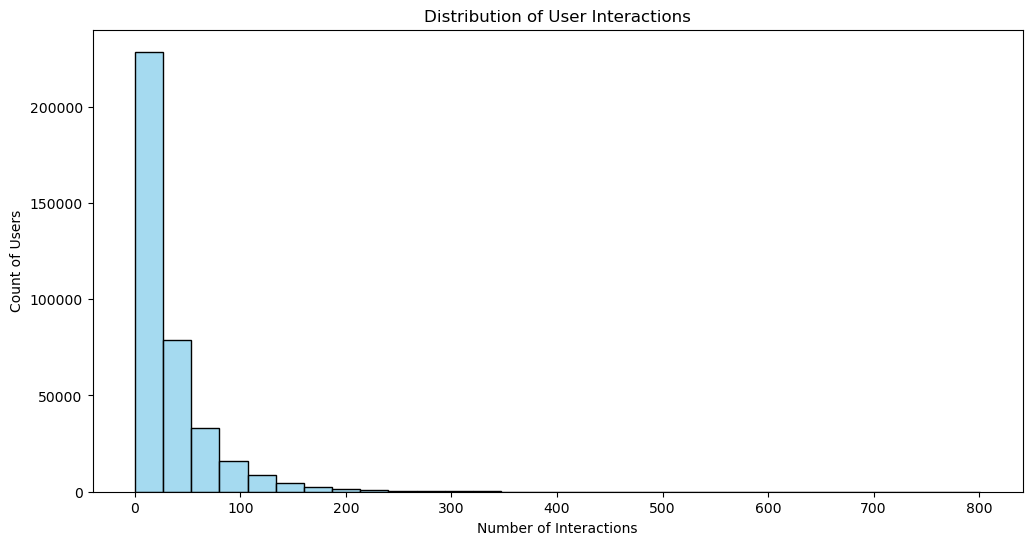

In [8]:
# Inspect the columns of behaviors_df to ensure 'History' exists
print(behaviors_df.columns)

# Assuming the correct column name is 'History', if not, replace 'History' with the correct column name
interaction_counts = behaviors_df[3].str.split(' ').map(lambda x: len(x) if isinstance(x, list) else 0)

# User interaction visualization
plt.figure(figsize=(12, 6))
sns.histplot(interaction_counts, bins=30, color='skyblue')
plt.xlabel('Number of Interactions')
plt.ylabel('Count of Users')
plt.title('Distribution of User Interactions')
plt.show()

In [16]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer


# 1. Handle missing values
# Assuming 'Category' and 'SubCategory' might have missing values
# Check the column names to ensure 'Category' and 'SubCategory' exist
print(news_df.columns)

# Assuming the correct column names are 'Category' and 'SubCategory', if not, replace them with the correct names
news_df[2].fillna('Unknown', inplace=True)
news_df[3].fillna('Unknown', inplace=True)

# Drop rows in behaviors_df where 'History' is missing if you assume these rows are not useful
# Inspect the data in column 4 to identify invalid datetime strings
print(behaviors_df[4].head(20))

# Assuming the correct column name for timestamp is 'Timestamp', replace 4 with 'Timestamp'
# Filter out rows with invalid datetime strings or handle them appropriately
# For example, you can drop rows with invalid datetime strings
# Ensure 'Processed_Title' column exists
# Assuming 'Title' is the correct column to process, replace 'Title' with the correct column name if needed
news_df['Processed_Title'] = news_df[1].str.lower().str.replace('[^\w\s]', '')

# Now fit_transform using the 'Processed_Title' column
title_matrix = vectorizer.fit_transform(news_df['Processed_Title'])
print(behaviors_df.head())

Index([0, 1, 2, 3, 4, 5, 6, 7, 'Title_Length', 'Processed_Title'], dtype='object')
Series([], Name: 4, dtype: datetime64[ns])
Empty DataFrame
Columns: [0, 1, 2, 3, 4]
Index: []


<>:25: SyntaxWarning: invalid escape sequence '\w'
<>:25: SyntaxWarning: invalid escape sequence '\w'
/var/folders/8l/zx9sdfms2gj66cqpyrj5nvsc0000gn/T/ipykernel_3825/736911123.py:25: SyntaxWarning: invalid escape sequence '\w'
  news_df['Processed_Title'] = news_df[1].str.lower().str.replace('[^\w\s]', '')
/var/folders/8l/zx9sdfms2gj66cqpyrj5nvsc0000gn/T/ipykernel_3825/736911123.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  news_df[2].fillna('Unknown', inplace=True)
/var/folders/8l/zx9sdfms2gj66cqpyrj5nvsc0000gn/T/ipyke